In [2]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
import regex as re
from pylab import *
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import backend.gotstools as gt
import src.test_EcgBeatDetector.wfdbtools as wfdb

# Example 1: Leg Abduction

This signal was generated by an IMU placed on the leg of a subject executing an abduction movement four times consecutively.

In [3]:
def vmagnitude(v):
    """
    Returns the magnitude of a tridimensional vector signal.
    :param v: (ndarray-like)

    :return: The magnitude of the signal.
    """
    return np.sqrt(v[:, 0] ** 2 + v[:, 1] ** 2 + v[:, 2] ** 2)

vm = np.array(pd.read_csv('./data/LegAbduction/Magnetometer.txt', header=None))
t, m = vm[:, 0], vm[:, 1:-1]
s = vmagnitude(m)

### Exercise 1.1. Initial instant detection

In [4]:
cfg = {
  "pre_processing": "\u229a\u223c100",
  "connotation": "\u21de0.5\u22020.05",
  "expression": "(._.-)"
}
ppsig, constr, matches, regit = gt.gots(s, cfg)

figure()
plot(ppsig)
[vlines(i[0], np.min(ppsig), np.max(ppsig)) for i in matches];

AttributeError: module 'backend.gotstools' has no attribute 'gots'

### Exercise 1.2. Ending instant detection

In [5]:
cfg = {
  "pre_processing": "\u229a\u223c100",
  "connotation": "\u21de0.5\u22020.05",
  "expression": "(.\+._)"
}
ppsig, constr, matches, regit = gt.gots(s, cfg)

figure()
plot(ppsig)
[vlines(i[0], np.min(ppsig), np.max(ppsig)) for i in matches];

AttributeError: module 'backend.gotstools' has no attribute 'gots'

# Example 2: Step Detection

In [5]:
vm = np.array(pd.read_csv('./data/StepDetection/test2/Accelerometer.txt', header=None))
t, m = vm[:, 0], vm[:, 1:-1]
s = vmagnitude(m)

AmpC(ns[0],9)
DiffC(ns[0],0.05)
AmpC(ns[0],9)
DiffC(ns[0],0.05)


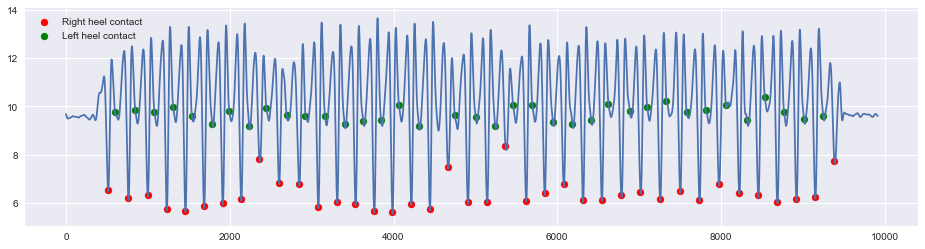

In [6]:
data_cfg = {
  "pre_processing": "\u26342,2,100\u223c50",
  "connotation": "\u21de9\u22020.05",
  "expression": "(0-){1}(0_){1,}(0\+){8,}"
}

ppsig, constr, matches, regit = gt.gots(s, data_cfg)
figure(figsize=(16, 4))
plot(ppsig)
[scatter(m[0], ppsig[m[0]], color='r', label='Right heel contact') if i == 0 
 else scatter(m[0], ppsig[m[0]], color='r') for i, m in enumerate(matches)];

data_cfg = {
  "pre_processing": "\u26342,2,100\u223c50",
  "connotation": "\u21de9\u22020.05",
  "expression": "(1-){1}(1_){1,}(1\+){8,}"
}

ppsig, constr, matches, regit = gt.gots(s, data_cfg)
[scatter(m[0], ppsig[m[0]], color='g', label='Left heel contact') if i == 0 
 else scatter(m[0], ppsig[m[0]], color='g') for i, m in enumerate(matches)];
legend();

# Example 3: Trajectory Tracking

## Example 3.1: Tracking Straight Lines

In [7]:
mapxy = np.array(pd.read_csv('./data/TrajectoryTracking/coord_demo3.txt', header=None))
x, y = mapxy[:, 0], mapxy[:, 1]

AmpC(ns[0],1)
DiffC(ns[0],0.05)
AmpC(ns[1],1)
DiffC(ns[1],0.05)


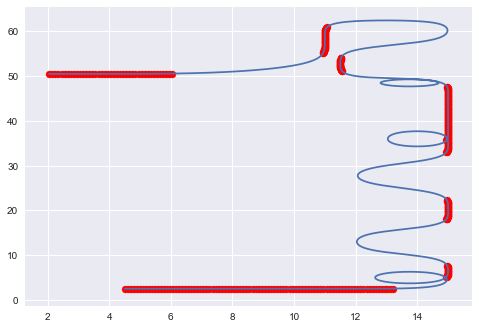

In [8]:
# Detection of straight lines
data_cfg = {
  "pre_processing": "\u223c70",
  "connotation": "\u21de1\u22020.05",
  "expression": "(._..|..._){20,}"
}


ppsig, constr, matches, regit = gt.gots(np.array([x, y]), data_cfg)

figure()
plot(ppsig[0], ppsig[1])
[scatter(ppsig[0][arange(m[0], m[1])], ppsig[1][arange(m[0], m[1])], color='r') for m in matches];

## Example 3.2: Tracking 360� Loops

### Example 3.2.1: Tracking 360� loops that start by turning up left

In [9]:
# Detection of straight lines
data_cfg = {
  "pre_processing": "\u223c70|\u223c70",
  "connotation": "\u22020.05,['e','p','d']|\u22020.05,['b','f','c']",
  "expression": "p.e.{,100}?c.[bf].*?d.[ep]"
    
}

ppsig, constr, matches, regit = gt.gotsMultiple(np.array([x, y]), data_cfg)

DiffC(ns[0],0.05,['e','p','d'])
DiffC(ns[1],0.05,['b','f','c'])
Finding Pattern...


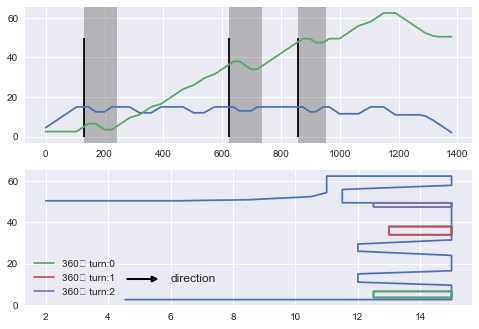

In [10]:
a = plt.subplot(2, 1, 1)
b = plt.subplot(2, 1, 2)
a.plot(x)
a.plot(y)
b.plot(x, y)
b.annotate('direction', xy=(x[0],y[0]+10), xytext=(6,y[0]+10),
            va='center', arrowprops={'arrowstyle': '<|-', 'lw': 2, 'ec': 'k', 'shrinkA': 10})
for s, i in enumerate(regit):
    a.vlines(i.span()[0]//2, 0, 50)
    a.axvspan(i.span()[0]//2, i.span()[1]//2, facecolor='0.5', alpha=0.5)
    b.plot(x[i.span()[0]//2: i.span()[1]//2], y[i.span()[0]//2:i.span()[1]//2], '-', label='360� turn:' + str(s))
plt.legend()

### Example 3.2.2: Tracking 360� loops that start by turning left down

In [11]:
x2 = x[::-1]
y2 = y[::-1]

# Detection of straight lines
data_cfg = {
  "pre_processing": "\u223c70|\u223c70",
  "connotation": "\u22020.05,['e','p','d']|\u22020.05,['b','f','c']",
  "expression": "e.{,200}?c.[bf].*?p"
}

ppsig, constr, matches, regit = gt.gotsMultiple(np.array([x2, y2]), data_cfg)

DiffC(ns[0],0.05,['e','p','d'])
DiffC(ns[1],0.05,['b','f','c'])
Finding Pattern...


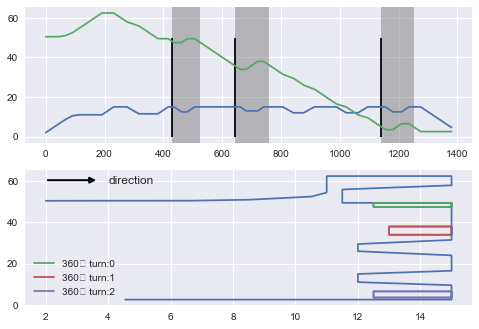

In [12]:
a = plt.subplot(2, 1, 1)
b = plt.subplot(2, 1, 2)
a.plot(x2, label='X')
a.plot(y2, label='Y')
b.plot(x2, y2)
b.annotate('direction', xy=(x2[0],y2[0]+10), xytext=(4,y2[0]+10),
            va='center', arrowprops={'arrowstyle': '<|-', 'lw': 2, 'ec': 'k', 'shrinkA': 10})
for s, i in enumerate(regit):
    a.vlines(i.span()[0]//2, 0, 50)
    a.axvspan(i.span()[0]//2, i.span()[1]//2, facecolor='0.5', alpha=0.5)
    b.plot(x2[i.span()[0]//2: i.span()[1]//2], y2[i.span()[0]//2:i.span()[1]//2], '-', label='360� turn:' + str(s))
plt.legend()

### Exercise 3.2.3: Tracking 360 � loops that start by turning left down 2

In [13]:
y3 = -1*y + max(y)

# Detection of straight lines
data_cfg = {
  "pre_processing": "\u223c70|\u223c70",
  "connotation": "\u22020.05,['e','p','d']|\u22020.05,['b','f','c']",
  "expression": "e.{,200}?c.[bf].*?p"
}

ppsig, constr, matches, regit = gt.gotsMultiple(np.array([x, y3]), data_cfg)

DiffC(ns[0],0.05,['e','p','d'])
DiffC(ns[1],0.05,['b','f','c'])
Finding Pattern...


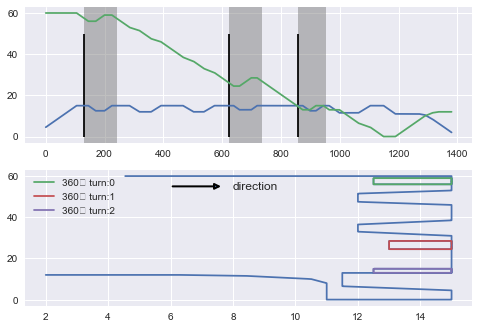

In [14]:
a = plt.subplot(2, 1, 1)
b = plt.subplot(2, 1, 2)
a.plot(x, label='X')
a.plot(y3, label='Y')
b.plot(x, y3)
b.annotate('direction', xy=(6,y3[0]-5), xytext=(8,y3[0]-5),
            va='center', arrowprops={'arrowstyle': '<|-', 'lw': 2, 'ec': 'k', 'shrinkA': 10})
for s, i in enumerate(regit):
    a.vlines(i.span()[0]//2, 0, 50)
    a.axvspan(i.span()[0]//2, i.span()[1]//2, facecolor='0.5', alpha=0.5)
    b.plot(x[i.span()[0]//2: i.span()[1]//2], y3[i.span()[0]//2:i.span()[1]//2], '-', label='360� turn:' + str(s))
plt.legend()

### Exercise 3.2.4: Tracking 360� loops that start by turning right down

In [15]:
x3 = -1*x + max(x)
y3 = -1*y + max(y)

# Detection of straight lines
data_cfg = {
  "pre_processing": "\u223c70|\u223c70",
  "connotation": "\u22020.05,['e','p','d']|\u22020.05,['b','f','c']",
  "expression": "d.{,200}?c.[bf].*?p"
}

ppsig, constr, matches, regit = gt.gotsMultiple(np.array([x3, y3]), data_cfg)

DiffC(ns[0],0.05,['e','p','d'])
DiffC(ns[1],0.05,['b','f','c'])
Finding Pattern...


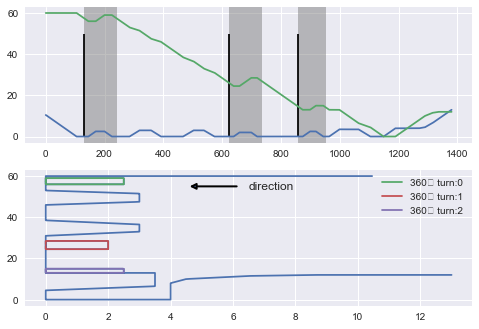

In [16]:
a = plt.subplot(2, 1, 1)
b = plt.subplot(2, 1, 2)
a.plot(x3, label='X')
a.plot(y3, label='Y')
b.plot(x3, y3)
b.annotate('direction', xy=(x[0],y3[0]-5), xytext=(x[20],y3[0]-5),
            va='center', arrowprops={'arrowstyle': '-|>', 'lw': 2, 'ec': 'k', 'shrinkA': 10})
for s, i in enumerate(regit):
    a.vlines(i.span()[0]//2, 0, 50)
    a.axvspan(i.span()[0]//2, i.span()[1]//2, facecolor='0.5', alpha=0.5)
    b.plot(x3[i.span()[0]//2: i.span()[1]//2], y3[i.span()[0]//2:i.span()[1]//2], '-', label='360� turn:' + str(s))
plt.legend()

# Example 4: BVP Segmentation

In [17]:
bvp = np.loadtxt('./data/BVP/file.txt')

In [18]:
# Detection of nodes of bvp signal
data_cfg = {
  "pre_processing": "\u263420\u22f82000",
  "connotation": "\u22bc0.3*max(ns[i])\u22020.01",
  "expression": "(1\+).+?(1-).+?(0[\+_-]).+?(0-).+?"
}

In [19]:
ppsig, constr, matches, regit = gt.gots(bvp[20000:25000], data_cfg)

RiseAmp(ns[0],0.3*max(ns[i]))
DiffC(ns[0],0.01)


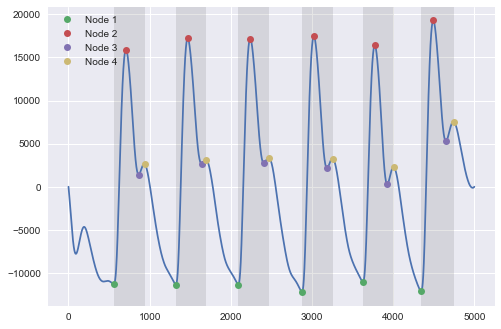

In [20]:
pos1=[]
pos2=[]
pos3=[]
pos4=[]
pos5=[]

plt.plot(ppsig)

for i in regit:
	pos1.append(i.span()[0] // 2)
	pos4.append(i.span()[1] // 2)
	pos2.append(i.span()[0] // 2 + re.search(i.group(2), i.group()).start() // 2)
	pos3.append(i.span()[0] // 2 + re.search(i.group(3), i.group()).start() // 2)

	axvspan(i.span()[0] // 2, i.span()[1] // 2, facecolor='0.5', alpha=0.2)

plt.plot(pos1, ppsig[pos1], 'o', label='Node 1')
plt.plot(pos2, ppsig[pos2], 'o', label='Node 2')
plt.plot(pos3, ppsig[pos3], 'o', label='Node 3')
plt.plot(pos4, ppsig[pos4], 'o', label='Node 4')
plt.legend()
    
# plt.vlines(pos1, -0.5*max(bvp), 0.5*max(bvp), linestyle='dashed', linewidth=0.5)
# plt.vlines(pos2, -0.5*max(bvp), 0.5*max(bvp), linestyle='dashed', linewidth=0.5)
# plt.vlines(pos3, -0.5*max(bvp), 0.5*max(bvp), linestyle='dashed', linewidth=0.5)
# plt.vlines(pos4, -0.5*max(bvp), 0.5*max(bvp), linestyle='dashed', linewidth=0.5)
plt.show()

# Example 5: Electrocardiogram peak detector

In [1]:
# --- Sequence  definition --- #
start, end = 0, 30
sequence_record = './data/EcgBeatDetection/100'

seq_data, seq_info = wfdb.rdsamp(sequence_record, start=start, end=end)
t, ecgsig = seq_data[:, 1], seq_data[:, 2]

# Detection of nodes of bvp signal
data_cfg = {
  "pre_processing": "\u26325,50,2,360",
  "connotation": "\u22bc0.4*(max(ns[i]) - min(ns[i]))\u22020.01",
  "expression": "(.\+.-)"
}

ppsig, constr, matches, regit = gt.gots(ecgsig, data_cfg)

plot(ppsig)
[vlines(i[0], np.min(ppsig), np.max(ppsig)) for i in matches];

NameError: name 'wfdb' is not defined

# Example 6: Detect Acceleration Peaks and Maximum of EMG
## Exercise 6.1: Detect the beggining of the run

In [22]:
s = np.loadtxt('./data/EMGandAcc/sc1.txt')

In [23]:
fs = 1000

acc1 = s[:, 3:6]
emg1 = s[:, 6]
emg2 = s[:, 7]

acc = vmagnitude(acc1)

In [24]:
# Find the start of the run
data_cfg = {
  "pre_processing": "\u229a\u2225\u223c500",
  "connotation": "\u21de0.2",
  "expression": "01"
}

In [25]:
ppsig, constr, matches, regit = gt.gots(acc, data_cfg)

AmpC(ns[0],0.2)


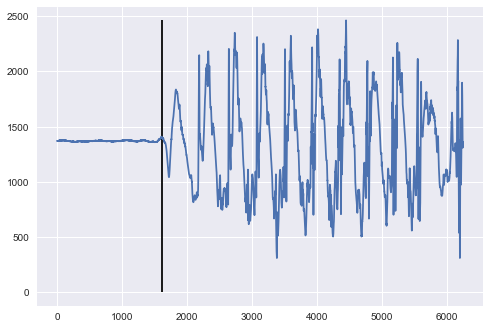

In [26]:
plot(acc)
vlines(matches[0][0], 0, max(acc))

## Exercise 6.2: Find the step where the change of direction happens

In [27]:
# Find the start of the run
data_cfg = {
  "pre_processing": "\u229a\u2225\u223c500|\u229a\u223c200",
  "connotation": "\u21de0.2|\u21de-0.2,'<'\u22020.01,['-','+','+']",
  "expression": "(?<=0[10][-_\+]1.{7500,})([10]1-[10]1\+)(.+?)([10]1-[10]1\+)"
}

In [28]:
ppsig, constr, matches, regit = gt.gotsMultiple(np.array([acc, acc]), data_cfg)

AmpC(ns[0],0.2)
AmpC(ns[1],-0.2,'<')
DiffC(ns[1],0.01,['-','+','+'])
Finding Pattern...


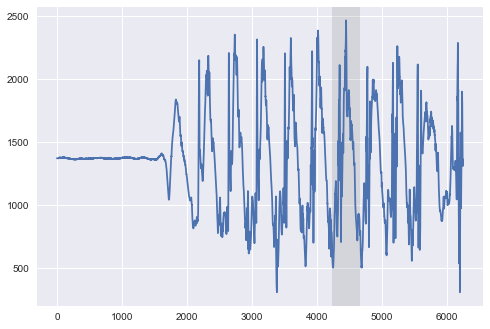

In [29]:
plot(acc)
axvspan(matches[0][0], matches[0][1], 0, max(acc), facecolor='0.5', alpha=0.2)

### Exercise 6.3: Find the pre activation peak and the activation peak of the step that changes the direction

In [30]:
# Find the start of the run and the peak of activation
data_cfg = {
  "pre_processing": "\u229a\u2225\u223c500|\u229a\u223c80",
  "connotation": "\u21de0.2,'>'|\u21de0,'>'\u22020.01,['-','_','+']",
  "expression": "(?<=0.[-_\+]1.{7500,})(11\+11_)"}

In [31]:
ppsig, constr, matches, regit = gt.gotsMultiple(np.array([acc, acc]), data_cfg)

AmpC(ns[0],0.2,'>')
AmpC(ns[1],0,'>')
DiffC(ns[1],0.01,['-','_','+'])
Finding Pattern...


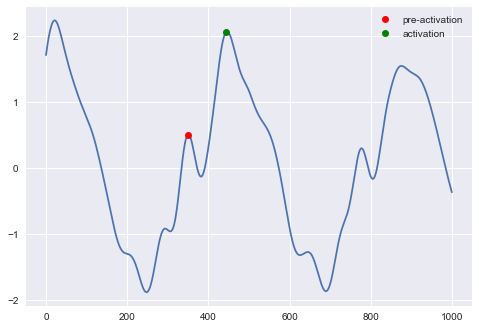

In [32]:
plot(ppsig[1][4000:5000])

plot(matches[0][0]-4000, ppsig[1][matches[0][0]], 'ro', label='pre-activation')
plot(matches[1][0]-4000, ppsig[1][matches[1][0]], 'go', label='activation')
legend()

### Exercise 6.4: Find the maximum value of the EMG signal during the change of direction

In [33]:
# Find the start of the run and the peak of activation
data_cfg = {
  "pre_processing": "\u229a\u2225\u223c500|\u229a\u223c200|\u229a\u2225\u223c500",
  "connotation": "\u21de0.2,'>'|\u21de-0.2,'<'\u22020.01,['-','+','+']|\u22020.01,['-','-','+']",
  "expression": "(?<=0.[-_\+]1.{10000,})11-.11\+.*?10.\+10.\-"}

In [34]:
ppsig, constr, matches, regit = gt.gotsMultiple(np.array([acc, acc, emg1]), data_cfg)

AmpC(ns[0],0.2,'>')
AmpC(ns[1],-0.2,'<')
DiffC(ns[1],0.01,['-','+','+'])
DiffC(ns[2],0.01,['-','-','+'])
Finding Pattern...


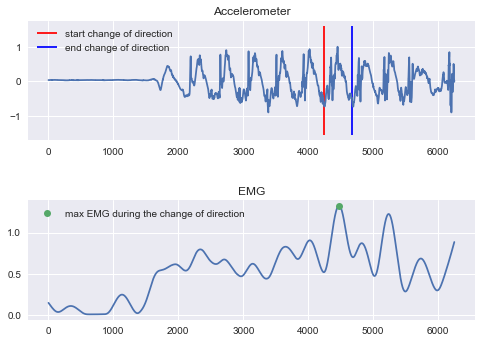

In [35]:
fig = figure()
fig.subplots_adjust(hspace=0.5)
a = fig.add_subplot(2,1,1)
b = fig.add_subplot(2,1,2)

a.plot((acc-np.mean(acc))/max(acc-np.mean(acc)))
b.plot(ppsig[2])
a.set_title('Accelerometer')
b.set_title('EMG')


a.vlines(matches[0][0], min(ppsig[1]), max(ppsig[1]), color='r', label='start change of direction')
a.vlines(matches[1][0], min(ppsig[1]), max(ppsig[1]), color='b', label='end change of direction')
b.plot(matches[0][1], ppsig[2][matches[0][1]], 'o', label='max EMG during the change of direction')
a.legend()
b.legend()